# OPTICS algorithm from scratch

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [17]:
X,y      = make_blobs(n_samples=50,n_features=2,centers=2,random_state=19)

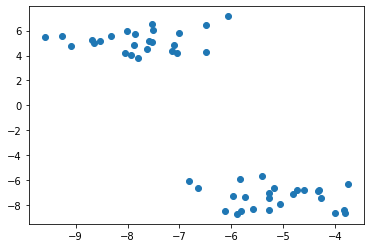

In [18]:
plt.scatter(X[:,0],X[:,1])

In [26]:
class OPTICS:
    def __init__(self,X,eps,min_pt):
        d = {}
        d['Points']=list(X)
        d['Cluster']=np.zeros(X.shape[0],dtype=int)
        d['Reachability Distance']=[10000]*X.shape[0]
        d['Core Distance']         = [0]*X.shape[0]
        self.df = pd.DataFrame(d)
        self.eps = eps
        self.min_pt = min_pt
        self.X = X
    
    def find_neighbors(self,p):
        '''Return the indices of Neighbourhood points '''
        n_points = [] #index and distance of the neighborhood point
        q=self.df['Points'][self.df.index!=p] #points except pth point
        for i,j in zip(q.index,q):
            d=np.linalg.norm(self.X[p]-j)
            if(d<eps):
                n_points.append((i,d))
        return n_points
    
    def update_poit(self,p,cluster):
        self.df.iloc[p,1] = cluster
    
    def core_reach_dist(self,p,n_points,cluster):
        '''Update the core and rechability distance'''
        if(len(n_points)>=min_pt):
            n_points.sort(key = lambda x:x[1]) #sort based on the distance in ascending order
            self.df.iloc[p,3]=n_points[min_pt-1][1] #updating the core distance
            self.update_poit(p,cluster)
            for j in n_points:
                r = max(j[1],n_points[min_pt-1][1]) #reachability distance
                if(r<self.df.iloc[j[0],2]): #if new reachability distance is smaller than old rechability distance
                    self.df.iloc[j[0],2] = r #update reachability distance

            for j in n_points:
                if(self.check_processed(j[0])==False):
                    n_points_neigh=self.find_neighbors(j[0])
                    n_points_neigh.sort(key = lambda x:x[1]) #sort based on the distance in ascending order
                    self.df.iloc[j[0],3]=n_points_neigh[min_pt-1][1] #updating the core distance
                    if(len(n_points_neigh)>=self.min_pt):
                        self.update_poit(j[0],cluster)
                        for k in n_points_neigh:
                            r = max(k[1],n_points_neigh[min_pt-1][1]) #reachability distance
                            if(r<self.df.iloc[k[0],2]): #if new reachability distance is smaller than old rechability distance
                                self.df.iloc[k[0],2] = r #update reachability distance
        else:
            self.update_poit(p,-1)
        
    def check_processed(self,p):
        if self.df['Cluster'][p]==0:
            return False
        return True

    def fit(self):
        cluster=1
        for i in self.df.index:
            if self.check_processed(i)==False:
                n_points_d = self.find_neighbors(i)
                self.core_reach_dist(i,n_points_d,cluster)
                cluster=cluster+1
                
    def result(self):
        return self.df

### Set the parameters here

In [27]:
eps=5
min_pt=3

In [28]:
model = OPTICS(X,eps,min_pt)

In [29]:
model.fit()

In [32]:
result = model.result()

In [33]:
result

,Points,Cluster,Reachability Distance,Core Distance
0,"[-4.318081464767769, -6.7955950723089655]",1,0.307464,0.414983
1,"[-9.25650928641327, 5.599834670506994]",2,0.644099,0.841993
2,"[-7.589592936362704, 5.176477669470069]",2,0.461310,0.569711
3,"[-7.633846053526408, 4.523118198202583]",2,0.461310,0.521574
4,"[-5.591589776390145, -8.326295621167743]",1,0.298204,0.492691
5,"[-7.867554052380145, 4.8083133879414115]",2,0.461977,0.461310
6,"[-8.652617391948084, 4.981142054891608]",2,0.416888,0.490187
7,"[-6.493784065096639, 4.291694412473044]",2,0.653506,0.845444
8,"[-7.937338358719736, 4.033042281101089]",2,0.521574,0.576439
9,"[-7.52654221885989, 6.567149205156642]",2,0.524520,0.917850


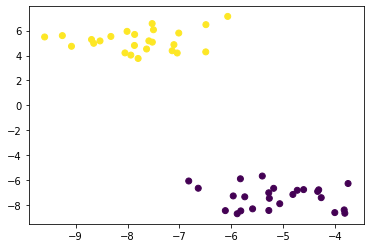

In [34]:
plt.scatter(model.X[:,0],model.X[:,1],c=result['Cluster'])